### Exploratory Data Analysis
This will show us how we can do EDA using python
### Three important step to keep in mind are:
1- Understand the data\
2- Clean the data\
3- Find a relationship between data

### Import library

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
k=sns.load_dataset("titanic")
k.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [3]:
#k.to_csv("k.csv")

In [4]:
k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
k.shape

(891, 15)

In [6]:
k.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
#unique value
k.nunique()

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

In [8]:
k.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [9]:
k["sex"].unique()

array(['male', 'female'], dtype=object)

In [10]:
k["deck"].unique()

[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

##### assignment how to check all unique value in one line

### Cleaning & filtering the data

In [11]:
#first check the missing value
k.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
k.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [13]:
#removing missing value columns | cleaning data
kc=k.drop(['deck'],axis=1)
kc.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False


In [14]:
kc.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64

In [15]:
kc.shape

(891, 14)

In [16]:
891-177

714

In [17]:
kc=kc.dropna()
kc

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [18]:
kc.dropna().shape

(712, 14)

In [19]:
kc.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [20]:
k.shape

(891, 15)

In [21]:
kc.shape

(712, 14)

In [22]:
kc['age'].value_counts()

age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [23]:
kc['sex'].value_counts()

sex
male      453
female    259
Name: count, dtype: int64

In [24]:
k.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [25]:
kc.describe()

,survived,pclass,age,sibsp,parch,fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [26]:
kc.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

<Axes: ylabel='age'>

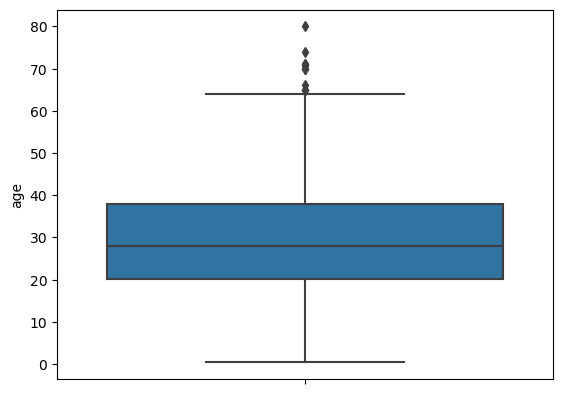

In [27]:
sns.boxplot(y="age",data=k)

C:\Users\CC\AppData\Local\Temp\ipykernel_11868\4241286432.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(kc['age'])
c:\Users\CC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Density'>

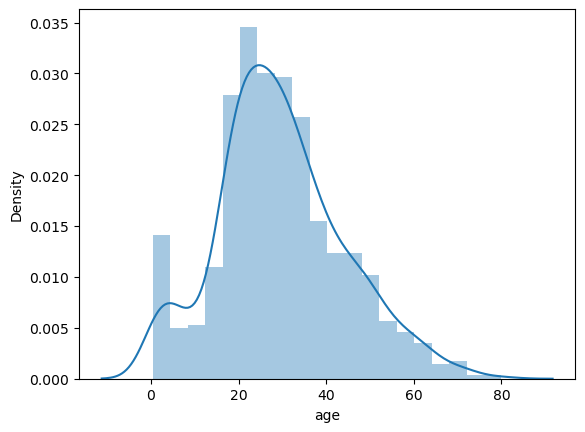

In [28]:
sns.distplot(kc['age'])

In [29]:
#removal of outliyers
kc["age"].mean()

29.64209269662921

In [30]:
kc["age"].mean()
kc.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False


In [31]:
kc=kc[kc['age']<66]
kc.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False


In [32]:
kc.shape

(704, 14)

In [33]:
kc["age"].mean()

29.16572443181818

C:\Users\CC\AppData\Local\Temp\ipykernel_11868\4241286432.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(kc['age'])
c:\Users\CC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Density'>

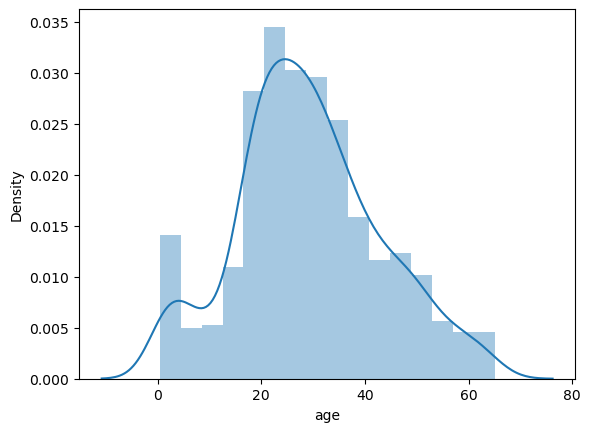

In [34]:
sns.distplot(kc['age'])

<Axes: ylabel='age'>

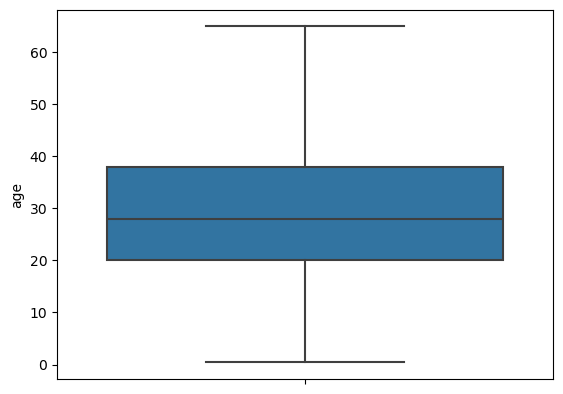

In [35]:
sns.boxplot(y="age",data=kc)

In [36]:
kc.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False


<Axes: >

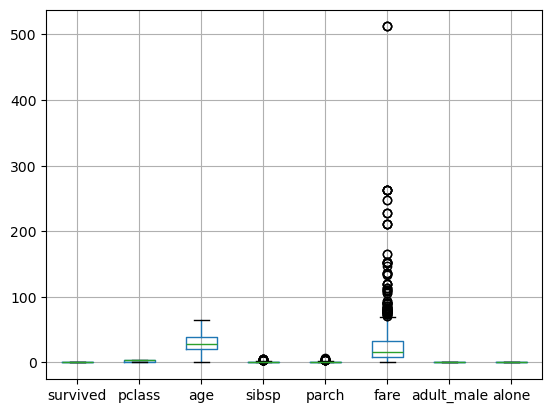

In [37]:
kc.boxplot()

In [38]:
kc=kc[kc['fare']<300]

<Axes: >

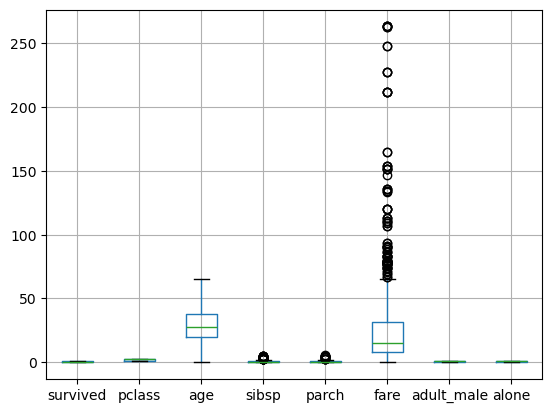

In [39]:
kc.boxplot()

C:\Users\CC\AppData\Local\Temp\ipykernel_11868\755358990.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(kc['fare'])
c:\Users\CC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='fare', ylabel='Density'>

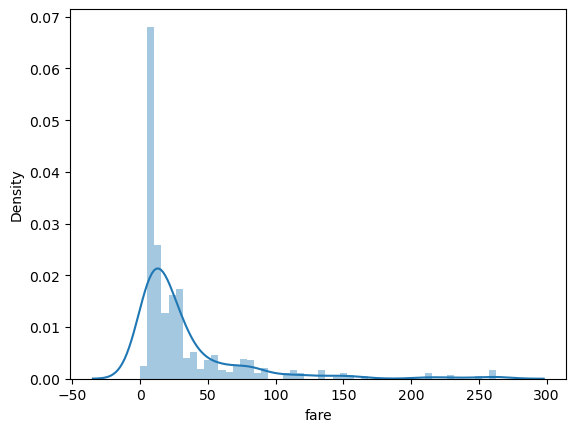

In [40]:
sns.distplot(kc['fare'])

array([[<Axes: title={'center': 'survived'}>,
        <Axes: title={'center': 'pclass'}>],
       [<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'sibsp'}>],
       [<Axes: title={'center': 'parch'}>,
        <Axes: title={'center': 'fare'}>]], dtype=object)

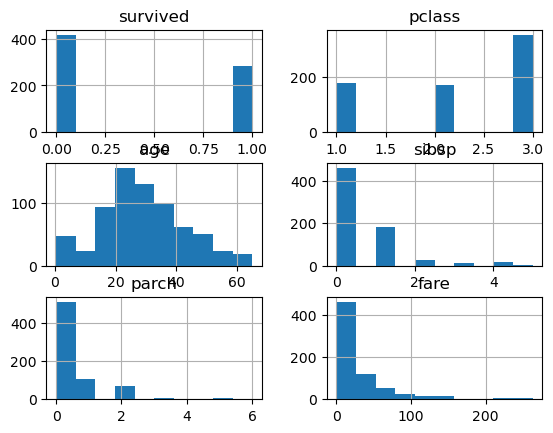

In [41]:
kc.hist()

C:\Users\CC\AppData\Local\Temp\ipykernel_11868\738497731.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(kc['survived']).plot.bar()


<Axes: xlabel='survived'>

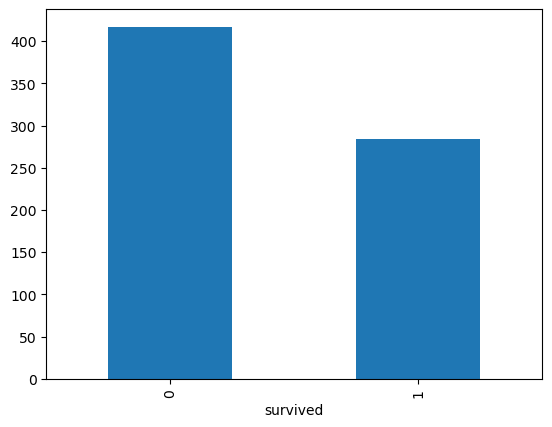

In [42]:
pd.value_counts(kc['survived']).plot.bar()

C:\Users\CC\AppData\Local\Temp\ipykernel_11868\2598394940.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(kc['sex']).plot.bar()


<Axes: xlabel='sex'>

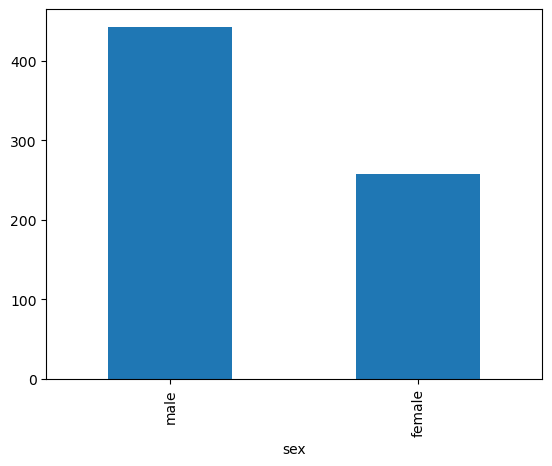

In [43]:
pd.value_counts(kc['sex']).plot.bar()

C:\Users\CC\AppData\Local\Temp\ipykernel_11868\2983862278.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(kc['class']).plot.bar()


<Axes: xlabel='class'>

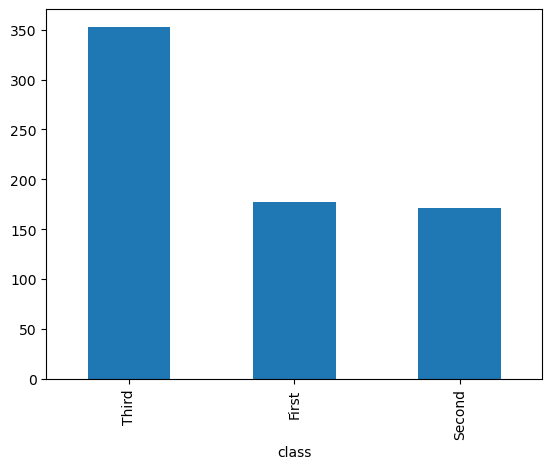

In [44]:
pd.value_counts(kc['class']).plot.bar()

C:\Users\CC\AppData\Local\Temp\ipykernel_11868\2347063444.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(kc['fare']).plot.bar()


<Axes: xlabel='fare'>

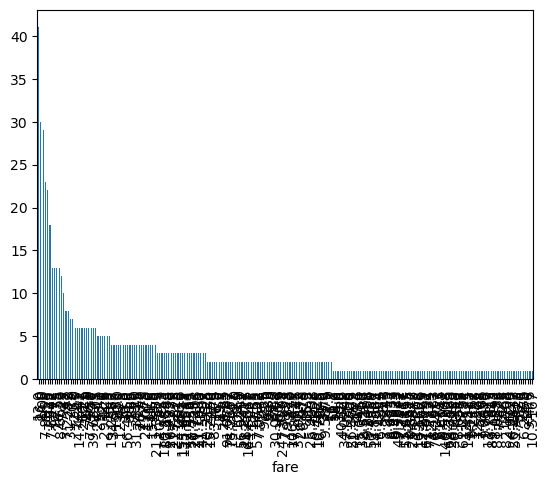

In [45]:
pd.value_counts(kc['fare']).plot.bar()

In [48]:
kc.describe()

,survived,pclass,age,sibsp,parch,fare
count,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000
mean,0.405136,2.251070,29.139330,0.520685,0.436519,32.600873
std,0.491269,0.833077,13.881836,0.935758,0.858924,43.110010
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,15.500000
75%,1.000000,3.000000,38.000000,1.000000,1.000000,31.387500
max,1.000000,3.000000,65.000000,5.000000,6.000000,263.000000


In [ ]:
kc.groupby(['class'])
type(kc)
kc.mean()

C:\Users\CC\AppData\Local\Temp\ipykernel_13344\3229079169.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  kc.groupby(['class'])


TypeError: Could not convert ['malefemalefemalefemalemalemalemalefemalefemalefemalefemalemalemalefemalefemalemalefemalemalemalefemalemalefemalefemalemalemalemalemalemalefemalefemalefemalefemalefemalefemalefemalemalemalefemalefemalemalefemalemalefemalemalemalemalemalefemalemalefemalemalemalefemalemalemalemalemalemalefemalemalemalemalefemalefemalemalefemalemalemalemalemalemalemalemalefemalemalefemalemalemalemalemalefemalemalemalefemalemalefemalefemalemalemalemalefemalemalemalefemalemalemalemalemalemalemalefemalefemalemalemalefemalemalemalemalefemalefemalemalemalemalemalefemalemalemalemalefemalemalemalemalefemalemalemalefemalemalemalemalemalefemalemalemalemalefemalemalemalemalefemalemalemalemalemalefemalemalemalemalefemalemalefemalemalefemalefemalemalefemalemalemalemalemalefemalemalemalefemalemalemalefemalemalemalefemalefemalemalefemalemalemalemalemalemalemalemalemalemalefemalemalemalefemalemalemalefemalemalemalemalemalemalemalefemalefemalemalemalefemalemalemalefemalefemalefemalefemalemalemalemalemalemalemalefemalefemalemalefemalemalefemalefemalemalefemalemalemalemalemalemalemalemalemalefemalefemalefemalemalefemalemalemalefemalefemalemalemalefemalemalefemalefemalefemalefemalemalemalefemalefemalemalefemalefemalemalemalefemalefemalefemalemalefemalefemalefemalemalemalemalemalefemalemalemalemalefemalemalemalemalefemalefemalemalemalemalemalemalemalefemalefemalemalemalefemalemalemalefemalefemalemalemalemalemalefemalefemalemalemalemalefemalefemalemalefemalemalemalefemalefemalemalemalemalefemalefemalemalefemalemalemalefemalemalemalefemalemalefemalemalemalemalemalefemalemalefemalefemalemalefemalemalemalefemalemalefemalefemalemalemalefemalemalemalefemalefemalefemalemalemalefemalemalemalefemalemalefemalemalefemalemalemalemalemalemalemalefemalemalemalemalemalemalemalefemalemalefemalefemalefemalemalemalemalefemalemalemalefemalemalefemalemalemalemalemalemalemalefemalefemalemalemalefemalefemalefemalemalefemalemalemalemalemalefemalemalemalefemalefemalemalefemalemalefemalemalefemalemalemalefemalemalefemalefemalemalefemalefemalefemalefemalefemalemalemalemalefemalemalemalemalemalemalefemalemalefemalefemalefemalemalemalemalemalefemalemalemalefemalemalemalemalefemalefemalemalefemalefemalemalemalefemalemalemalemalemalefemalemalemalemalemalemalefemalemalemalemalemalemalefemalefemalefemalemalefemalemalefemalefemalemalemalemalemalemalemalemalemalefemalemalemalemalefemalefemalemalemalefemalemalefemalefemalefemalemalemalemalefemalefemalemalefemalemalefemalemalemalemalemalemalemalemalemalemalemalefemalemalemalemalemalefemalefemalemalemalemalemalemalemalemalemalefemalemalefemalemalemalemalemalemalemalefemalemalefemalemalemalemalefemalemalefemalefemalemalemalemalemalefemalefemalemalefemalemalemalemalemalemalefemalemalefemalefemalemalemalemalemalefemalemalefemalemalemalemalefemalemalemalefemalemalemalemalefemalemalemalemalemalefemalemalemalefemalemalefemalefemalemalemalemalefemalefemalemalefemalefemalefemalefemalemalemalemalefemalemalemalemalemalemalemalefemalefemalemalefemalemalefemalemalemalemalemalemalefemalemalefemalemalemalemalefemalemalefemalemalemalemalefemalemalemalefemalemalemalefemalemalemalemalefemalemalemalemalemalefemalemalemalemalemalemalemalefemalefemalefemalefemalefemalemalefemalemalemalefemalemalefemalefemalemalemalemalefemalemalemalefemalefemalemalemalefemalefemalemalefemalemalemalefemalemalefemalemalemale'
 'SCSSSSSSCSSSSSSQSSSQSSSSCCSSSCSSCQSSSCSCSCSSCSSSSSSSSSCSSSSSSSSSSSSSSSSSCSSSSSSSSSSCSSCSSCSSCSSCSSCSSSSCSSSCSSQSSSSSSSSSSCQSSSSSSSSSSQSSCSCSSSSSSQSSSSSCCSSSSCSSSCQCSSSSCSSCSSSSSSSSSSSSSSSSSSSSCQSSSSSSSSCSSSSSSSSSSSSCSSQSQSSSCSSSQSCCSSCSCSSCCCCCSSSSSSSCSSQSCSSSCSSSSCSSSSSSSSSSSSCSSSSSCCSSCCCSSCSSCCSCCSSSSSCSSSCSSSSSSSSSSSSSSSQSSSSSQSSSSSSSSSSSSSSSSSSSSSSCSSCCCSSSSSSSSCSSCSSSSSSSSCSCSSSSSCSSSQSSCSSSQSCSSSSSSSCQSSSSCSSSCCSSSSCSSSSCSCSSCSSSSSSSSSSSSSSSSSCSCSSCSSCSSSSCSSCSSSCSSSSSSSSCSCSSSQSSSCSSSSSSCSCCSCSSSQSQSCSCSSSSSSSSSSSSSCSSSCSSSSSCCSSSCSCSCQSSSSSCSSSSCSSSSSSSSSSSSCSSSSSCSSSSSQSSSSSSSSSSSCSSSQSSSSSSSSCSSSSSQSCSSSSSCSSSSCSSSSSSSSSSSSCSSSSSSSCCSSSCSSSSCCSSCSSCSSSSSCSSSSSCSSSSSSCCSSCSSSSSQSSCQ'] to numeric

In [ ]:
kc.mean()


TypeError: Could not convert ['malefemalefemalefemalemalemalemalefemalefemalefemalefemalemalemalefemalefemalemalefemalemalemalefemalemalefemalefemalemalemalemalemalemalefemalefemalefemalefemalefemalefemalefemalemalemalefemalefemalemalefemalemalefemalemalemalemalemalefemalemalefemalemalemalefemalemalemalemalemalemalefemalemalemalemalefemalefemalemalefemalemalemalemalemalemalemalemalefemalemalefemalemalemalemalemalefemalemalemalefemalemalefemalefemalemalemalemalefemalemalemalefemalemalemalemalemalemalemalefemalefemalemalemalefemalemalemalemalefemalefemalemalemalemalemalefemalemalemalemalefemalemalemalemalefemalemalemalefemalemalemalemalemalefemalemalemalemalefemalemalemalemalefemalemalemalemalemalefemalemalemalemalefemalemalefemalemalefemalefemalemalefemalemalemalemalemalefemalemalemalefemalemalemalefemalemalemalefemalefemalemalefemalemalemalemalemalemalemalemalemalemalefemalemalemalefemalemalemalefemalemalemalemalemalemalemalefemalefemalemalemalefemalemalemalefemalefemalefemalefemalemalemalemalemalemalemalefemalefemalemalefemalemalefemalefemalemalefemalemalemalemalemalemalemalemalemalefemalefemalefemalemalefemalemalemalefemalefemalemalemalefemalemalefemalefemalefemalefemalemalemalefemalefemalemalefemalefemalemalemalefemalefemalefemalemalefemalefemalefemalemalemalemalemalefemalemalemalemalefemalemalemalemalefemalefemalemalemalemalemalemalemalefemalefemalemalemalefemalemalemalefemalefemalemalemalemalemalefemalefemalemalemalemalefemalefemalemalefemalemalemalefemalefemalemalemalemalefemalefemalemalefemalemalemalefemalemalemalefemalemalefemalemalemalemalemalefemalemalefemalefemalemalefemalemalemalefemalemalefemalefemalemalemalefemalemalemalefemalefemalefemalemalemalefemalemalemalefemalemalefemalemalefemalemalemalemalemalemalemalefemalemalemalemalemalemalemalefemalemalefemalefemalefemalemalemalemalefemalemalemalefemalemalefemalemalemalemalemalemalemalefemalefemalemalemalefemalefemalefemalemalefemalemalemalemalemalefemalemalemalefemalefemalemalefemalemalefemalemalefemalemalemalefemalemalefemalefemalemalefemalefemalefemalefemalefemalemalemalemalefemalemalemalemalemalemalefemalemalefemalefemalefemalemalemalemalemalefemalemalemalefemalemalemalemalefemalefemalemalefemalefemalemalemalefemalemalemalemalemalefemalemalemalemalemalemalefemalemalemalemalemalemalefemalefemalefemalemalefemalemalefemalefemalemalemalemalemalemalemalemalemalefemalemalemalemalefemalefemalemalemalefemalemalefemalefemalefemalemalemalemalefemalefemalemalefemalemalefemalemalemalemalemalemalemalemalemalemalemalefemalemalemalemalemalefemalefemalemalemalemalemalemalemalemalemalefemalemalefemalemalemalemalemalemalemalefemalemalefemalemalemalemalefemalemalefemalefemalemalemalemalemalefemalefemalemalefemalemalemalemalemalemalefemalemalefemalefemalemalemalemalemalefemalemalefemalemalemalemalefemalemalemalefemalemalemalemalefemalemalemalemalemalefemalemalemalefemalemalefemalefemalemalemalemalefemalefemalemalefemalefemalefemalefemalemalemalemalefemalemalemalemalemalemalemalefemalefemalemalefemalemalefemalemalemalemalemalemalefemalemalefemalemalemalemalefemalemalefemalemalemalemalefemalemalemalefemalemalemalefemalemalemalemalefemalemalemalemalemalefemalemalemalemalemalemalemalefemalefemalefemalefemalefemalemalefemalemalemalefemalemalefemalefemalemalemalemalefemalemalemalefemalefemalemalemalefemalefemalemalefemalemalemalefemalemalefemalemalemale'
 'SCSSSSSSCSSSSSSQSSSQSSSSCCSSSCSSCQSSSCSCSCSSCSSSSSSSSSCSSSSSSSSSSSSSSSSSCSSSSSSSSSSCSSCSSCSSCSSCSSCSSSSCSSSCSSQSSSSSSSSSSCQSSSSSSSSSSQSSCSCSSSSSSQSSSSSCCSSSSCSSSCQCSSSSCSSCSSSSSSSSSSSSSSSSSSSSCQSSSSSSSSCSSSSSSSSSSSSCSSQSQSSSCSSSQSCCSSCSCSSCCCCCSSSSSSSCSSQSCSSSCSSSSCSSSSSSSSSSSSCSSSSSCCSSCCCSSCSSCCSCCSSSSSCSSSCSSSSSSSSSSSSSSSQSSSSSQSSSSSSSSSSSSSSSSSSSSSSCSSCCCSSSSSSSSCSSCSSSSSSSSCSCSSSSSCSSSQSSCSSSQSCSSSSSSSCQSSSSCSSSCCSSSSCSSSSCSCSSCSSSSSSSSSSSSSSSSSCSCSSCSSCSSSSCSSCSSSCSSSSSSSSCSCSSSQSSSCSSSSSSCSCCSCSSSQSQSCSCSSSSSSSSSSSSSCSSSCSSSSSCCSSSCSCSCQSSSSSCSSSSCSSSSSSSSSSSSCSSSSSCSSSSSQSSSSSSSSSSSCSSSQSSSSSSSSCSSSSSQSCSSSSSCSSSSCSSSSSSSSSSSSCSSSSSSSCCSSSCSSSSCCSSCSSCSSSSSCSSSSSCSSSSSSCCSSCSSSSSQSSCQ'] to numeric

In [ ]:
cols =['Sex', 'Pclass', 'SibSp', 'Parch', 'Cabin', 'Embarked']
for col in dfs[cols]: print(col + ':\n', dfs[col].unique())